In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
import autograd.numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 

## load in data, define multiclass softmax cost

<IPython.core.display.Javascript object>


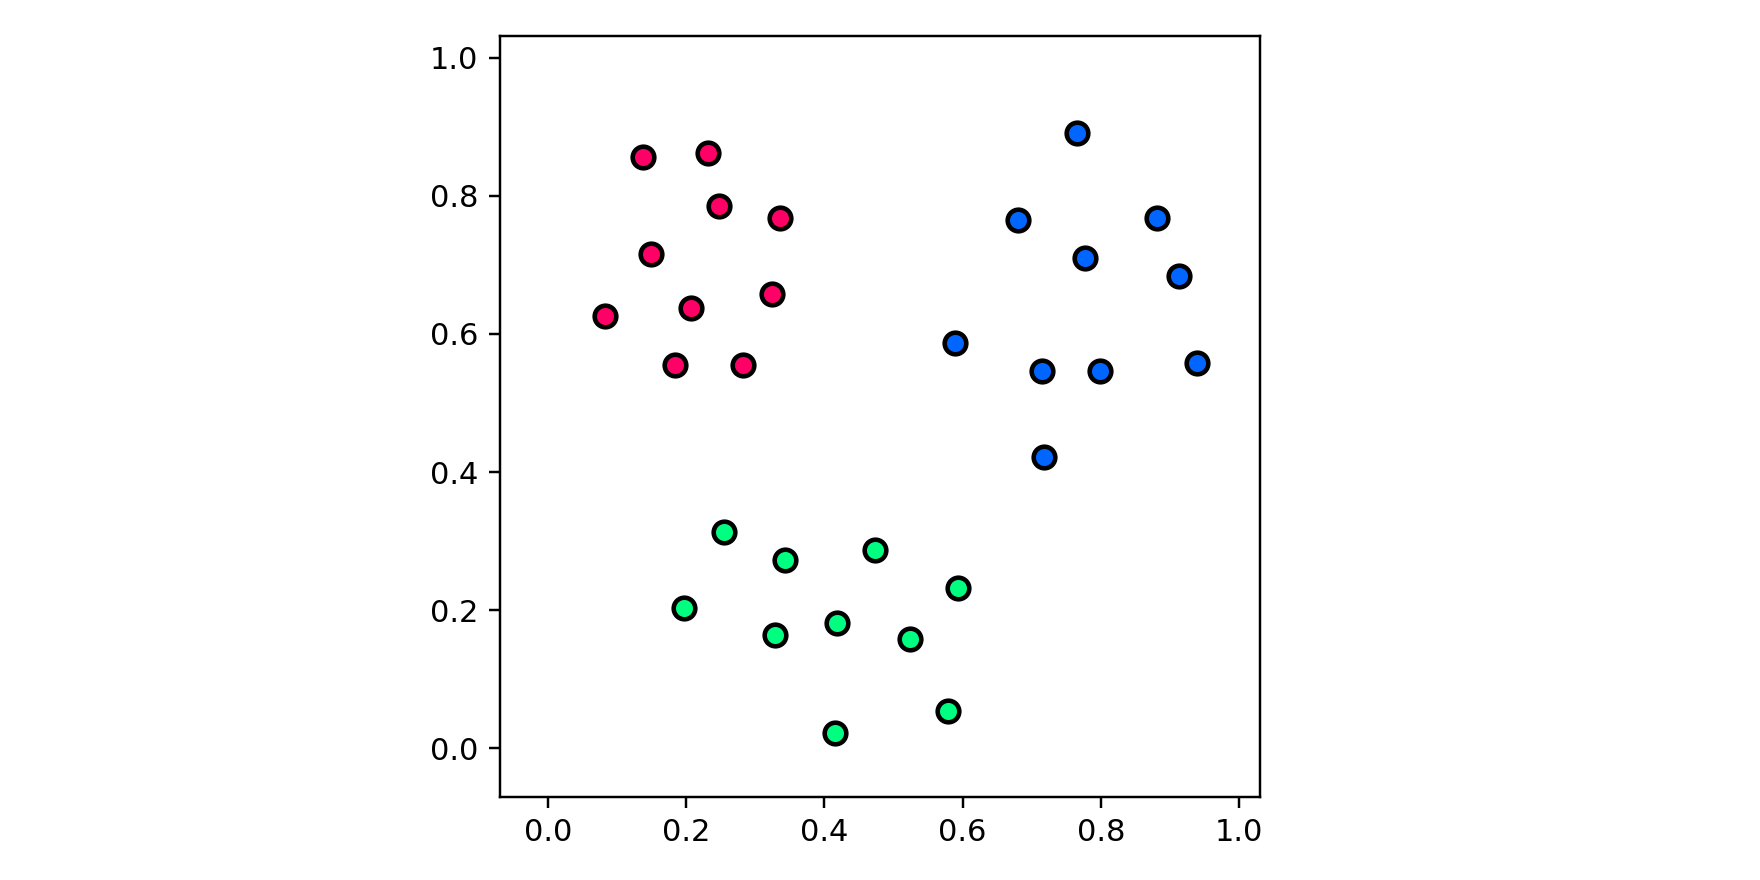

In [2]:
# load in dataset
data = np.loadtxt('../../mlrefined_datasets/superlearn_datasets/3class_data.csv',delimiter = ',')

# create an instance of the ova demo
demo = superlearn.multiclass_illustrator.Visualizer(data)

# visualize dataset
demo.show_dataset()

In [3]:
# define the input and output of our dataset
x = np.asarray(data[:,:-1])
x.shape = (len(x),np.shape(data)[1]-1); x = x.T;
y = data[:,-1]
y.shape = (len(y),1)

In [4]:
# multiclass softmaax regularized by the summed length of all normal vectors
lam = 10**-3  # our regularization paramter 
def multiclass_softmax(W):        
    # pre-compute predictions on all points
    all_evals = W[0,:] + np.dot(x.T,W[1:,:])

    # compute counting cost
    cost = 0
    for p in range(len(y)):
        # pluck out current true label
        y_p = int(y[p][0]) - 1    # subtract off one due to python indexing

        # update cost summand
        cost +=  np.log(np.sum(np.exp(all_evals[p,:]))) - all_evals[p,y_p]
        
        # return cost with regularizer added
    return cost + lam*np.linalg.norm(W[1:,:],'fro')**2

In [5]:
# declare an instance of our current our optimizers
opt = superlearn.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
W_init = np.random.randn(3,3)
w_hist = opt.gradient_descent(g = multiclass_softmax,w = W_init,version = 'unnormalized',max_its = 500, alpha = 10**-2)

<IPython.core.display.Javascript object>


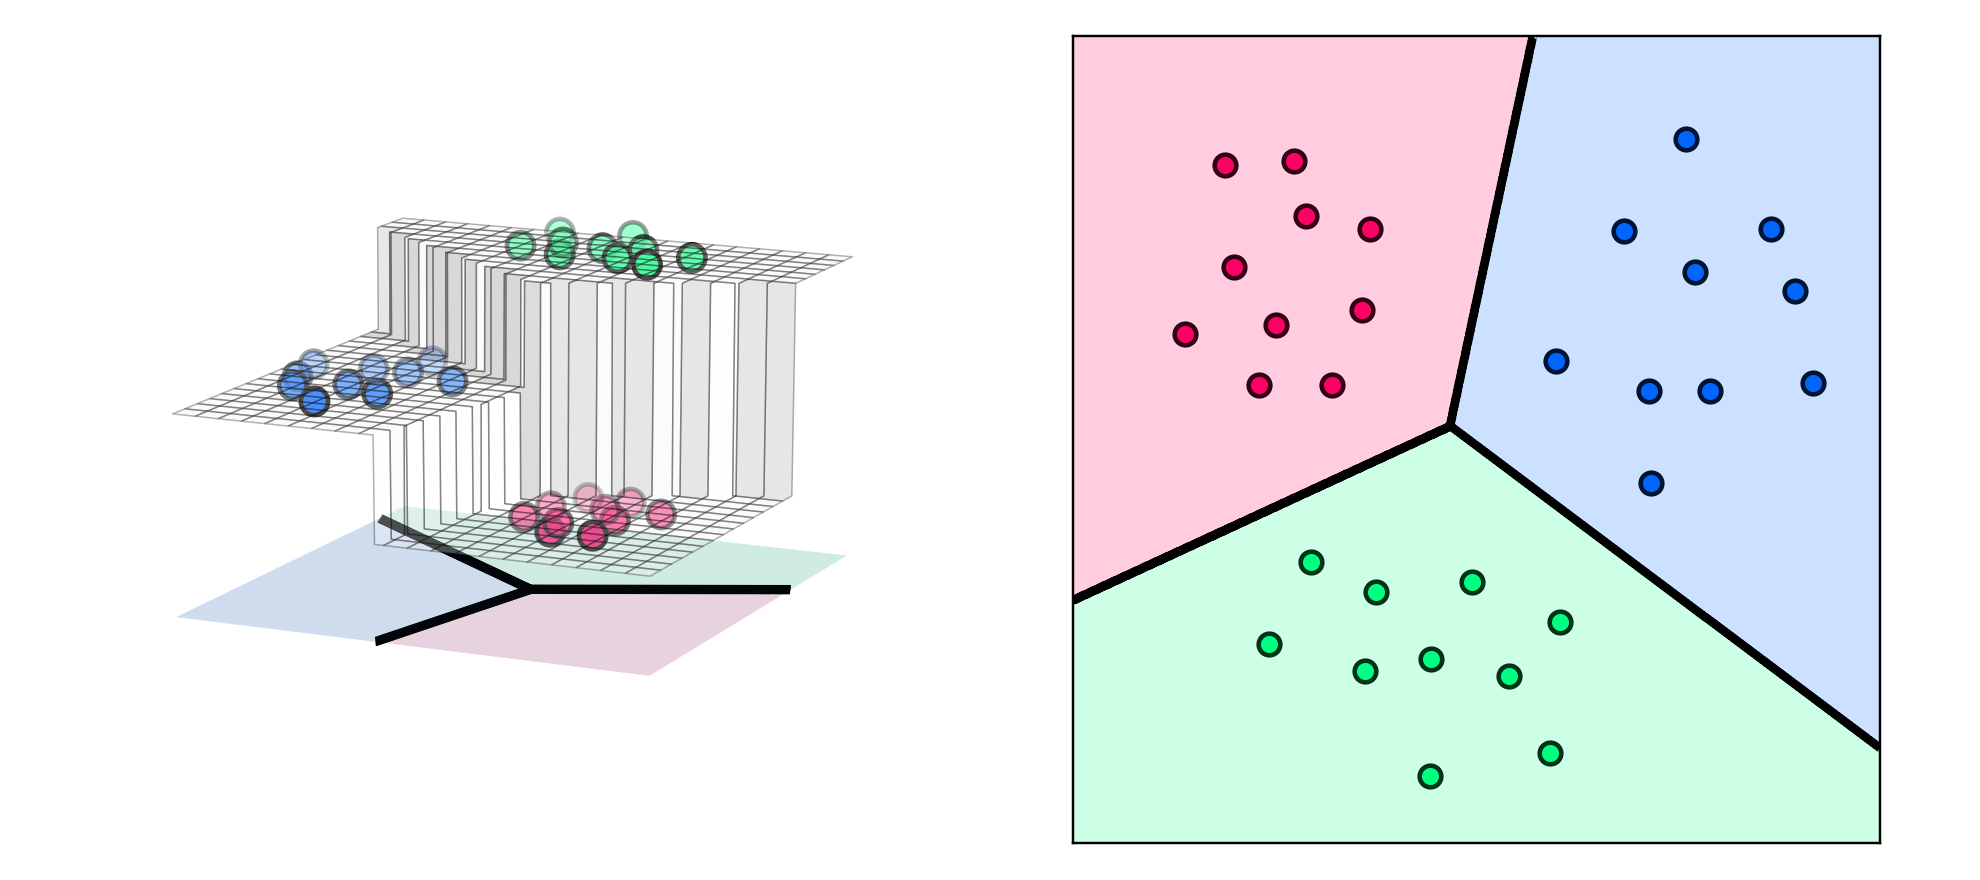

In [6]:
# plot classification of space, individual learned classifiers (left panel) and joint boundary (middle panel), and cost-function panel in the right panel
demo.show_surface_fit(w_hist,view = [15,115])

In [7]:
np.shape(x)

(2, 30)